<a href="https://colab.research.google.com/github/eliazulai29/tensor/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-16 05:16:59.736657


In [ ]:
# Check out the features


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Create circles
X, y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)


In [ ]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

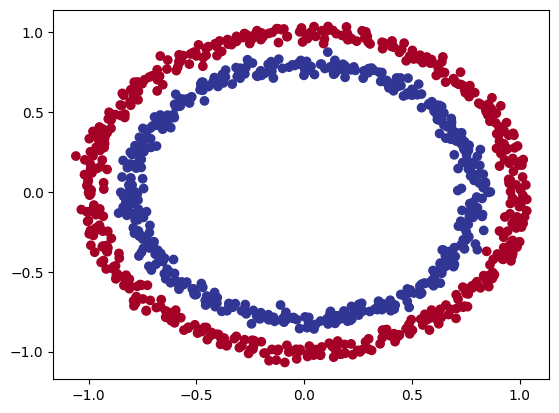

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
plt.scatter(circles['X0'], circles['X1'],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0]

array([0.75424625, 0.23148074])

### In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
# 3. Fit the model
model_1.fit(X,y,epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5100


[0.695747435092926, 0.5099999904632568]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


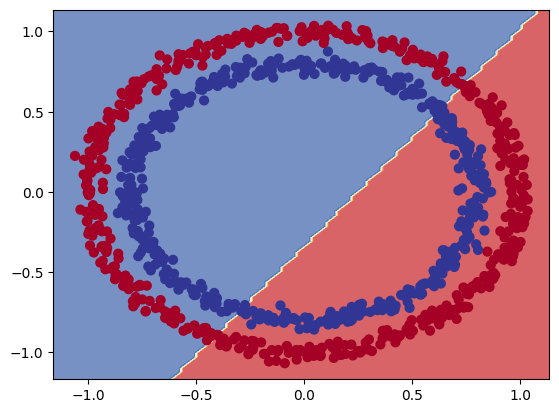

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_1, X, y)

In [ ]:
# N = 100 # number of points per class
# D = 2 # dimensionality
# K = 3 # number of classes
# X = np.zeros((N*K,D)) # data matrix (each row = single example)
# y = np.zeros(N*K, dtype='uint8') # class labels
# for j in range(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N) # radius
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j
# # lets visualize the data:
# plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
# plt.show()

In [ ]:
tf.random.set_seed(42)
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

In [ ]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

# 3. Fit the model
#model_3.fit(X_reg_train, y_reg_train,  epochs=100, verbose=0) # fit for 100 passes of the data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)


2/2 [==============================] - 0s 7ms/step


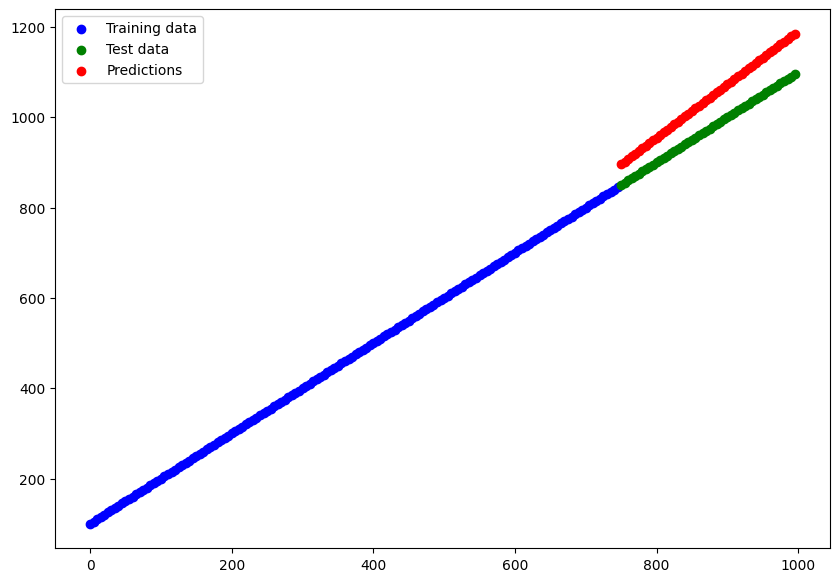

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test,c="g", label="Test data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend()

### The missing piece: Non-liearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.3092 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2049 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1531 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0141 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.9427 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8507 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8483 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8476 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8474 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8465 - accuracy: 0.4740
Epoch 11/

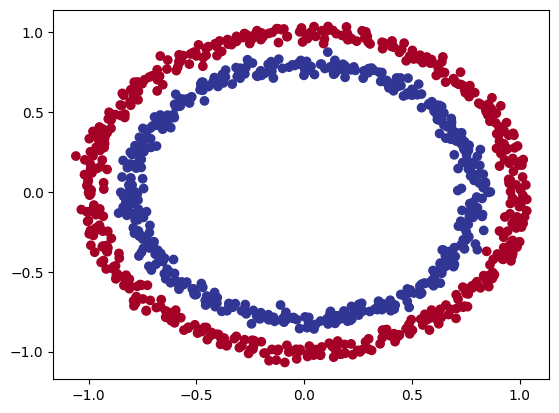

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)



313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


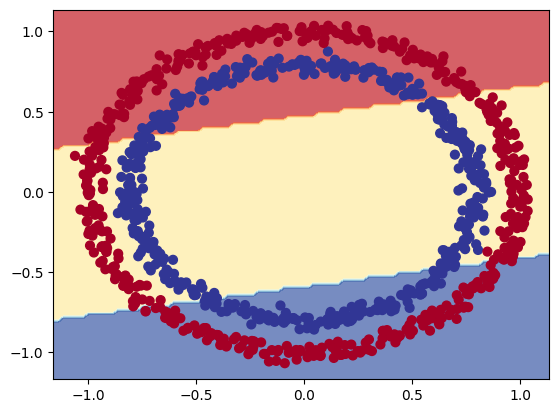

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

# build first neural network with a non-linear activation funcation

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# Fit the model
history = model_5.fit(X,y,epochs=100, verbose=0)

### # build a model with more hidden layer to check accuracy improve


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)

])


# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# Fit the model
history = model_5.fit(X,y,epochs=100, verbose=0)

In [ ]:
# Evalaute the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 4.3652 - accuracy: 0.5000


[4.365181922912598, 0.5]

313/313 [==============================] - 0s 763us/step
doing binary classifcation...


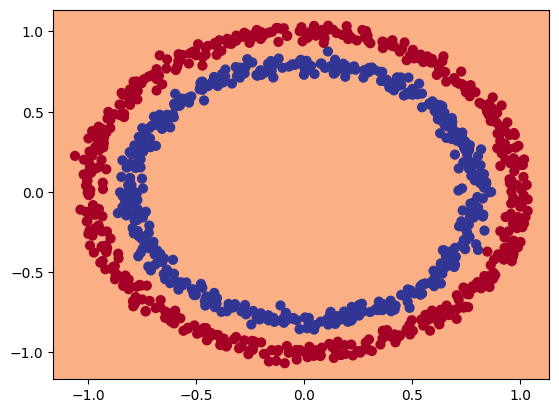

In [ ]:
# How to our model prediction look
plot_decision_boundary(model_6, X,y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)

])


# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


# Fit the model
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5120
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5140
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5220
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5300
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5400
Epoch 11/

313/313 [==============================] - 0s 764us/step
doing binary classifcation...


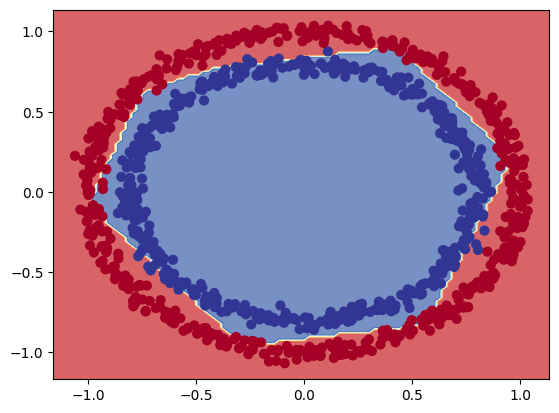

In [ ]:
# How to our model prediction look
plot_decision_boundary(model_7, X,y)

In [ ]:
# Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9560


[0.29597920179367065, 0.9559999704360962]

### Create a toy a tensor

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
A.shape, A.ndim

(TensorShape([20]), 1)

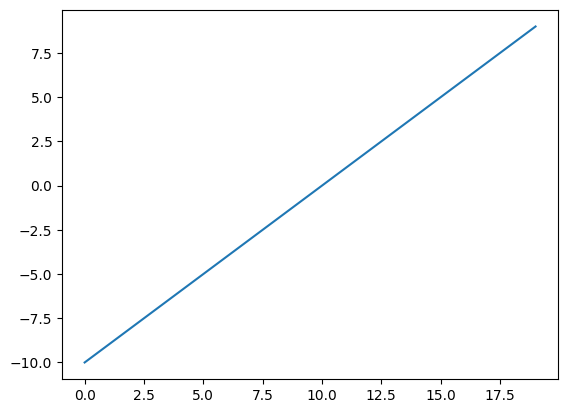

In [ ]:
plt.plot(A)

In [ ]:
# replicate Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x))


In [ ]:
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

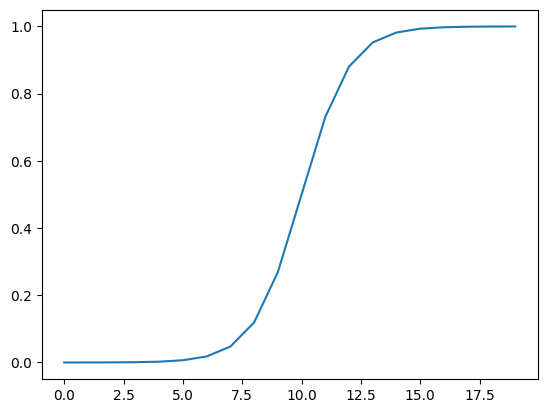

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# replicate relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

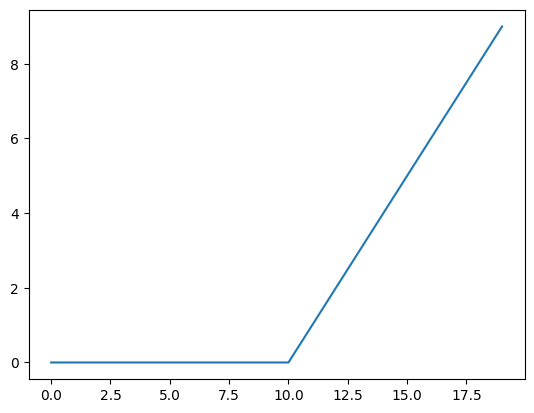

In [ ]:
plt.plot(relu(A))

### evaluation and improving our classificiation

In [ ]:
len(X), len(y), X.shape, y.shape

(1000, 1000, (1000, 2), (1000,))

In [ ]:
# Split into train set and test sets
X_train, y_train = X[:800], y[:800]
X_test , y_test = X[800:], y[800:]
X_train.shape, y_train.shape , X_test.shape , y_test.shape


((800, 2), (800,), (200, 2), (200,))

### Create model to fit on train set and evaluating on the testing data

In [ ]:
from keras.src.layers.attention.multi_head_attention import activation
# Set Random Seed
tf.random.set_seed(42)

# Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# model compile
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# fit the model
history = model_8.fit(X_train, y_train, epochs = 100, verbose=0)


In [ ]:
X_train.shape

(800, 2)

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000


[0.01060813944786787, 1.0]

313/313 [==============================] - 0s 836us/step
doing binary classifcation...


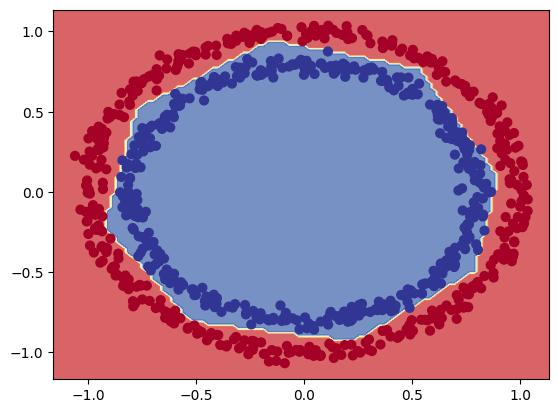

In [ ]:
# How to our model prediction look
plot_decision_boundary(model_8, X_train, y_train)

In [ ]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 0s 793us/step
doing binary classifcation...
313/313 [==============================] - 0s 876us/step
doing binary classifcation...


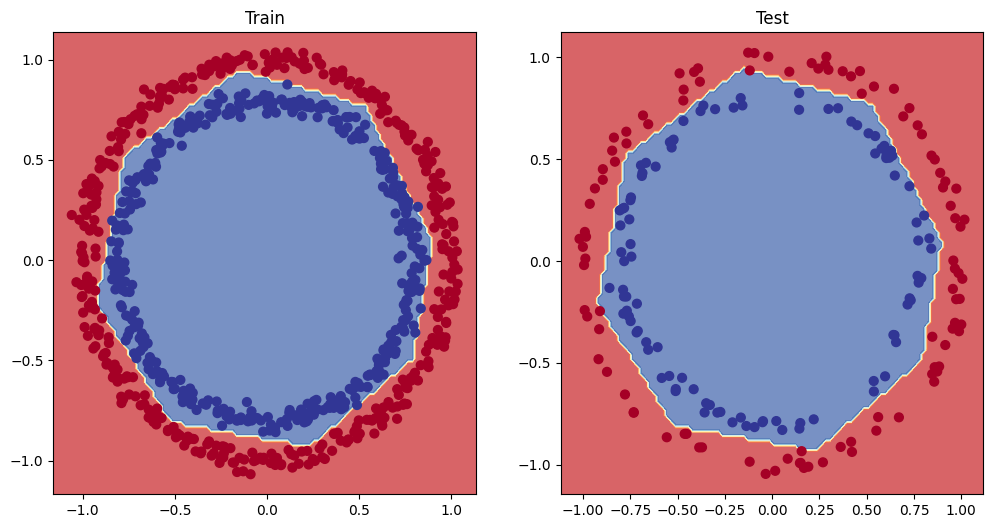

In [ ]:
# Plot the decision boundaries for tranning and testing data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()



### ## Plot the loss (or traing) curves

Text(0.5, 1.0, 'MOdel_8 loss curves')

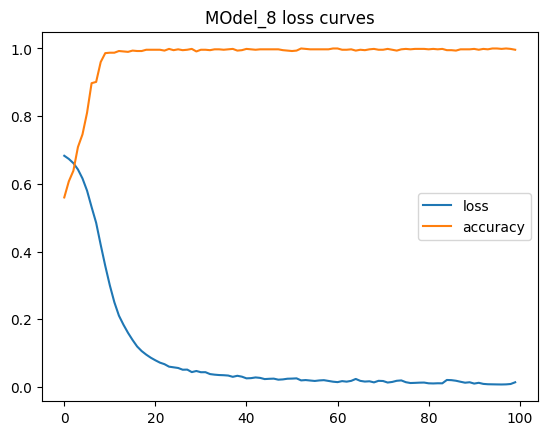

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history).plot()
plt.title("MOdel_8 loss curves")


### Finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics= tf.keras.metrics.Accuracy())

# Create laerning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit model_9 passing lr_scheduler callback
histtory_9 = model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]

)



Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7091 - accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.0000e+00 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.0000e+00 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.0000e+00 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.0000e+00 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.0000e+00 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.0000e+00 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.0000e+00 - lr: 2.2387e-04
Epoch 9/100
25/25 [=====================

In [ ]:
t = pd.DataFrame(histtory_9.history)
t.columns

Index(['loss', 'accuracy', 'lr'], dtype='object')

<Axes: xlabel='epochs'>

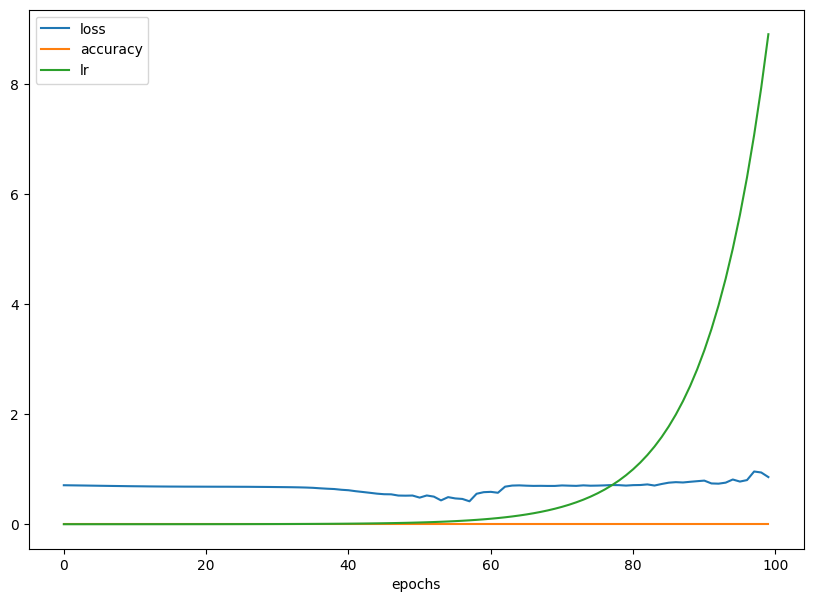

In [ ]:
# check the history
pd.DataFrame(histtory_9.history).plot(figsize=(10,7), xlabel="epochs")

In [ ]:
histtory_9.history["loss"]

[0.7090936899185181,
 0.7072778344154358,
 0.7054553031921387,
 0.703602135181427,
 0.7015666961669922,
 0.6995686292648315,
 0.6976734399795532,
 0.695717990398407,
 0.6940352916717529,
 0.6920854449272156,
 0.6905704736709595,
 0.6893280148506165,
 0.687766432762146,
 0.6867018342018127,
 0.6857308149337769,
 0.6848539710044861,
 0.6843616962432861,
 0.6836464405059814,
 0.6834147572517395,
 0.6830682158470154,
 0.6826867461204529,
 0.6823039054870605,
 0.6819984316825867,
 0.6818863153457642,
 0.681306004524231,
 0.6808784604072571,
 0.6804942488670349,
 0.6792587041854858,
 0.6784115433692932,
 0.6773328185081482,
 0.6758671402931213,
 0.6745023131370544,
 0.6729636192321777,
 0.6705889105796814,
 0.6672763824462891,
 0.6621710062026978,
 0.6534075736999512,
 0.6459445357322693,
 0.639991283416748,
 0.6267805695533752,
 0.6181703805923462,
 0.6006816625595093,
 0.5863352417945862,
 0.5716956257820129,
 0.5560666918754578,
 0.5457298159599304,
 0.5436658263206482,
 0.521553397178649

Text(0.5, 1.0, 'Learning rate vs loss')

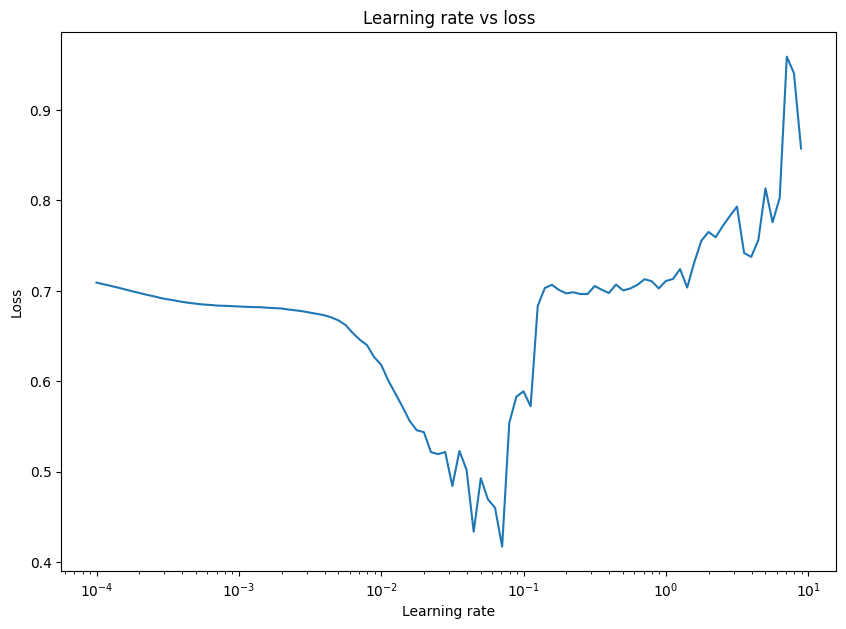

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, histtory_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
10**-2

0.01

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics= tf.keras.metrics.Accuracy())

# # Create laerning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit model_9 passing lr_scheduler callback
histtory_10 = model_10.fit(
    X_train,
    y_train,
    epochs=20,

)

Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6971 - accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.0000e+00
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.0000e+00
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.0000e+00
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.0000e+00
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.0000e+00
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.0000e+00
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.0000e+00
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.0000e+00
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3533 - 

In [ ]:
# Evaluate model 10 on test dataset

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.0000e+00


[0.09647610038518906, 0.0]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000


[0.01060813944786787, 1.0]

313/313 [==============================] - 0s 841us/step
doing binary classifcation...
313/313 [==============================] - 0s 854us/step
doing binary classifcation...


<function matplotlib.pyplot.show(close=None, block=None)>

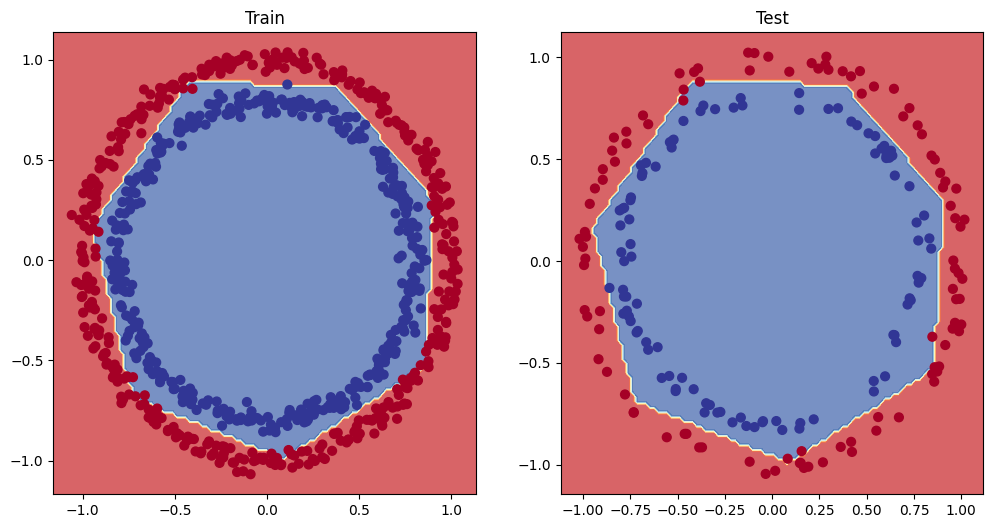

In [ ]:
# Plot the decision boundaries for the traning and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show




In [ ]:
# More classification evaluation methods


In [ ]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the the set: {(accuracy*100):.2f}&")

7/7 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.0000e+00
Model loss on the test set: 0.09647610038518906
Model accuracy on the the set: 0.00&


In [ ]:
# Create a confusion metrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# convert prediction probabilities to binary format and view the first 10
#tf.round(y_preds)

# Create a confusion metrix
confusion_matrix(y_test, tf.round(y_preds))




7/7 [==============================] - 0s 1ms/step


array([[96,  5],
       [ 0, 99]])

In [ ]:
# How about we make a function to make our confusion matrix a little more visual?

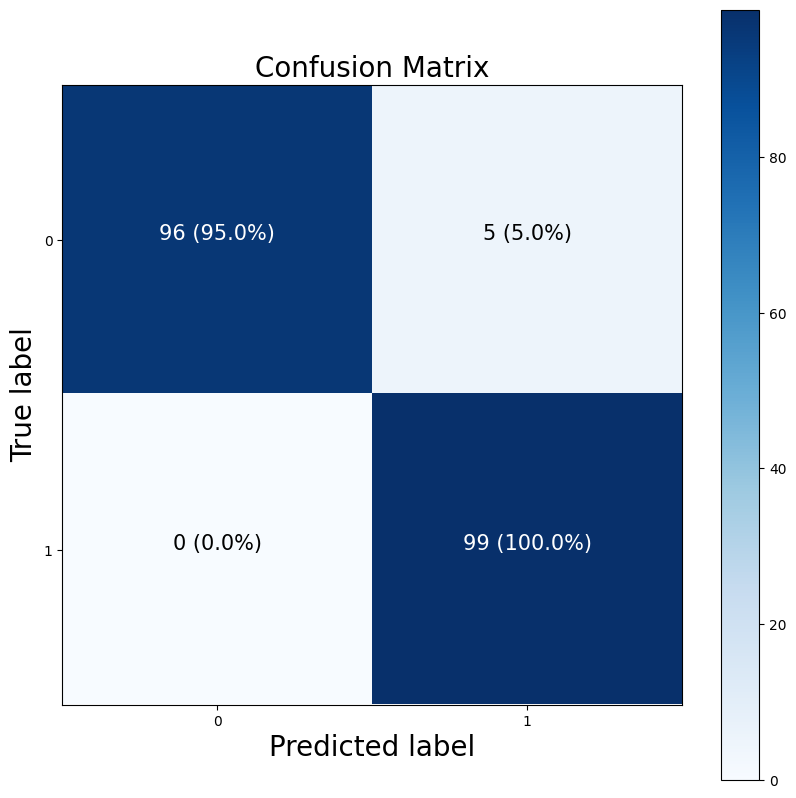

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### Working with a larger example (multiclass classification)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[7]

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

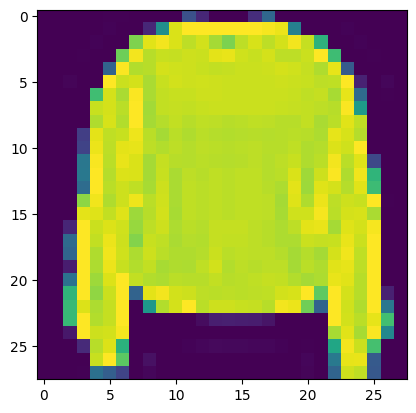

In [58]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check our samples label
train_labels[7]

2

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

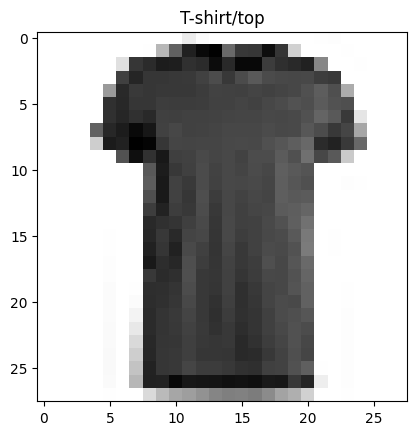

In [59]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax

])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training



In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [4]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 0.00392156862745098)

In [ ]:
# We'll use the same model as before (model_11) except this time the data will be normalized.

In [55]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3198 - accuracy: 0.5662 - val_loss: 0.9580 - val_accuracy: 0.6774
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8230 - accuracy: 0.7032 - val_loss: 0.7638 - val_accuracy: 0.7161
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7158 - accuracy: 0.7269 - val_loss: 0.7110 - val_accuracy: 0.7307
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6769 - accuracy: 0.7387 - val_loss: 0.6916 - val_accuracy: 0.7300
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6577 - accuracy: 0.7427 - val_loss: 0.6662 - val_accuracy: 0.7433
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6427 - accuracy: 0.7486 - val_loss: 0.6627 - val_accuracy: 0.7433
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6321 - accuracy: 0.7561 - val_loss: 0.6650 - val_accuracy

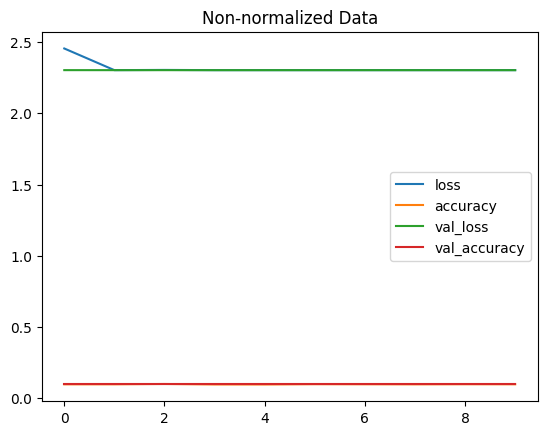

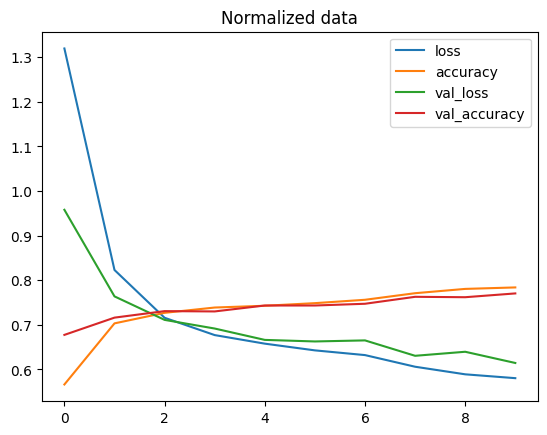

In [56]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

# Finding the ideal learning rate

In [5]:
from keras.src.callbacks import CallbackList
from keras.api._v2.keras.losses import SparseCategoricalCrossentropy
from keras.api._v2.keras.metrics import SparseCategoricalAccuracy
# Set a random seed
tf.random.set_seed(42)

# Build model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile the model
model_13.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(
    train_data,
    train_labels,
    epochs=40,
    validation_data=(test_data, test_labels),
    callbacks=[lr_scheduler]
)


Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.7024 - accuracy: 0.3410 - val_loss: 1.2334 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0426 - accuracy: 0.6028 - val_loss: 0.9566 - val_accuracy: 0.6391 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8935 - accuracy: 0.6675 - val_loss: 0.8627 - val_accuracy: 0.6711 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8276 - accuracy: 0.6933 - val_loss: 0.8154 - val_accuracy: 0.7011 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7883 - accuracy: 0.7087 - val_loss: 0.7823 - val_accuracy: 0.7141 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7586 - accuracy: 0.7222 - val_loss: 0.7591 - val_accuracy: 0.7242 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [7]:
1e-3 * 10

0.01

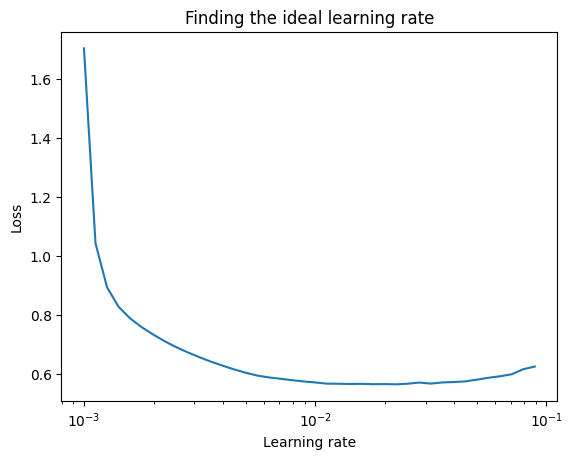

In [6]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
find_lr_history.history["loss"]

In [7]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [8]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# Make predictions with the most recent model
y_probs = model_13.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[1.2795902e-16, 6.5845516e-18, 3.4566775e-21, 9.5946961e-10,
        2.2062811e-14, 4.2661853e-02, 2.3922312e-16, 1.4791772e-01,
        4.4726459e-08, 8.0942035e-01],
       [2.5181940e-03, 4.9597643e-06, 9.2144614e-01, 1.4090724e-04,
        3.7177827e-03, 1.4342362e-16, 7.2026335e-02, 4.9232782e-29,
        1.4566003e-04, 1.7447566e-26],
       [2.6981902e-13, 9.9998850e-01, 2.7029171e-07, 8.8954503e-06,
        2.2265258e-06, 2.2921125e-14, 2.7661187e-10, 1.5078353e-11,
        2.0135764e-16, 2.0426938e-19],
       [2.7218321e-14, 9.9993140e-01, 9.7855981e-09, 6.3500127e-05,
        4.3034142e-06, 4.5194515e-11, 5.0641335e-11, 6.9224183e-07,
        4.6329932e-15, 1.0757737e-15],
       [1.9042915e-01, 3.8909717e-03, 3.8204473e-01, 1.5102933e-01,
        8.2340948e-03, 7.3811146e-10, 2.6404169e-01, 1.2522697e-16,
        3.2998921e-04, 8.8264780e-13]], dtype=float32)

In [10]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.2795902e-16, 6.5845516e-18, 3.4566775e-21, 9.5946961e-10,
        2.2062811e-14, 4.2661853e-02, 2.3922312e-16, 1.4791772e-01,
        4.4726459e-08, 8.0942035e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [11]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 7, 7])

In [12]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[737,   4,  30, 173,   2,   6,  35,   0,  13,   0],
       [  1, 948,  11,  37,   1,   0,   1,   0,   1,   0],
       [ 31,  17, 686,  31, 142,   9,  78,   0,   6,   0],
       [ 22,  28,  20, 873,   8,  25,   6,  13,   4,   1],
       [  1,  12, 113,  72, 675,  38,  62,   8,  19,   0],
       [  0,   0,   0,   2,   0, 707,   0, 207,   1,  83],
       [229,   4, 140, 119, 121,  11, 341,   1,  34,   0],
       [  0,   0,   0,   0,   0,   4,   0, 956,   0,  40],
       [  4,   1,   2,  11,   2, 259,  22,   5, 689,   5],
       [  0,   0,   0,   0,   0,   8,   0,  60,   1, 931]])

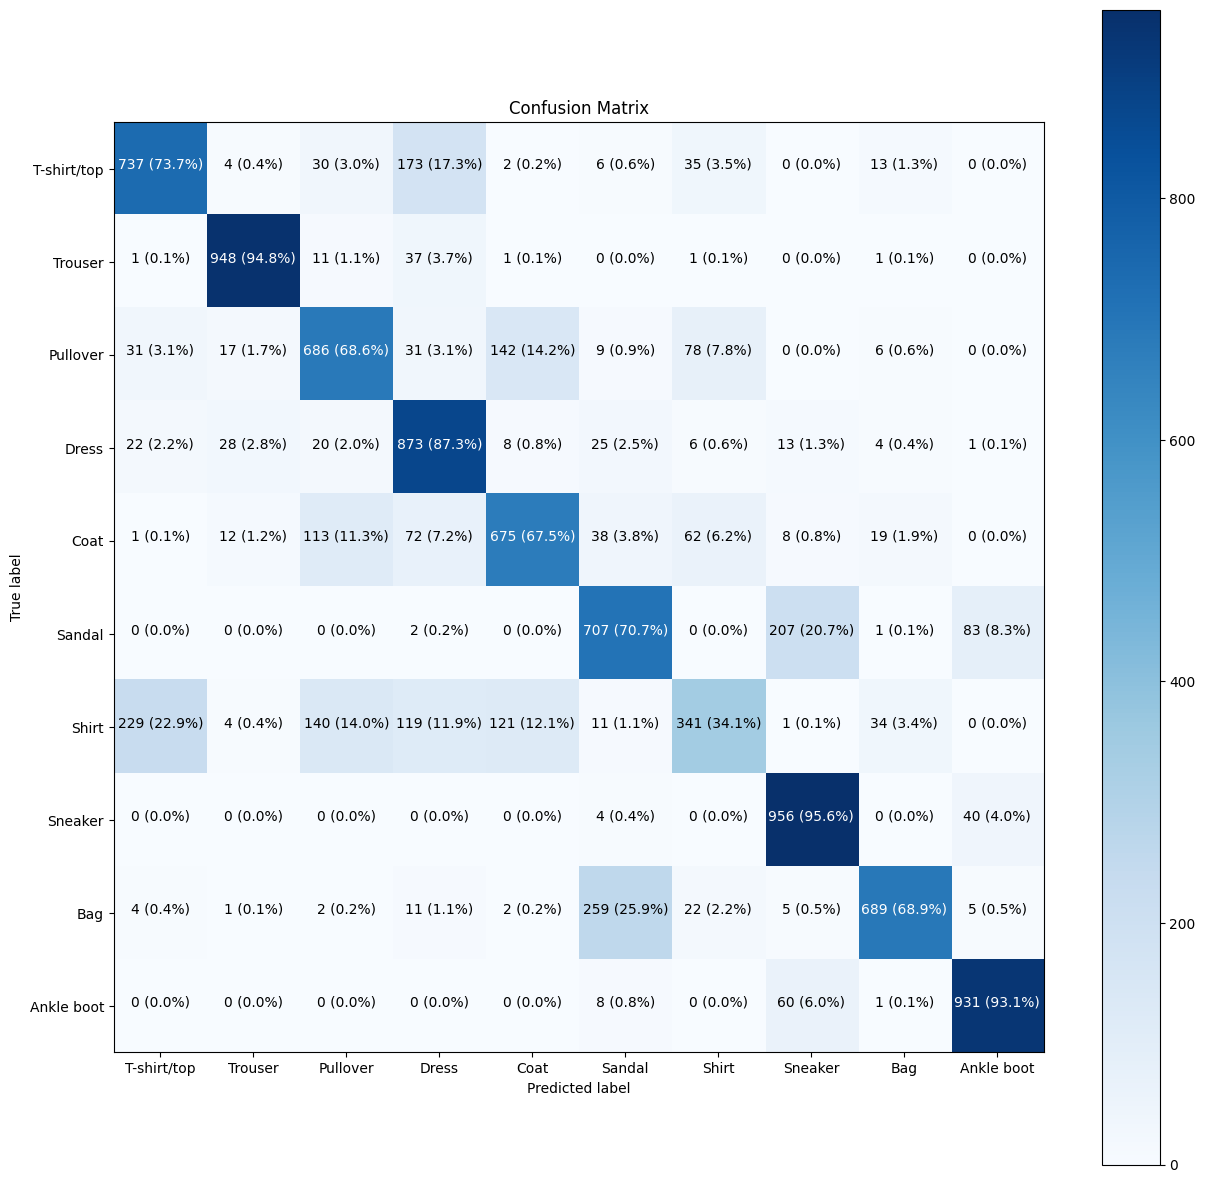

In [13]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


In [14]:

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 65ms/step


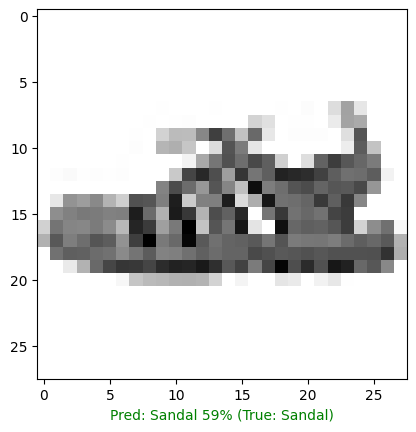

In [36]:
# Check out a random image as well as its prediction
plot_random_image(model=model_13,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
test_data.shape , test_data[0]

In [26]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
i = random.randint(0, len(test_data))
i

7223

In [37]:
test_data.shape


(10000, 28, 28)

In [38]:
# Find the layers of our most recent model
model_13.layers

In [40]:
# Extract a particular layer
model_13.layers[0]

In [41]:
# Get the patterns of a layer in our network
weights, biases = model_13.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-7.3177180e+00, -6.9629394e-02,  9.2199965e+00,  3.3183696e+00],
        [-2.5796879e+01, -6.9735929e-02,  2.4364124e+01, -1.8007093e+01],
        [ 1.6918661e+01, -4.6879586e-02,  2.8570294e+00, -2.9808016e+01],
        ...,
        [ 3.5851209e+00, -7.2213016e-02,  2.0609442e+01, -7.8621287e+00],
        [-2.7153943e+00,  5.9160739e-02,  2.1778000e+01,  2.1881964e+01],
        [ 2.2029701e+01,  1.3635725e-02, -1.9291378e+01, -1.9054905e+01]],
       dtype=float32),
 (784, 4))

In [42]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.5970169 , -0.00600449,  0.58633554,  0.3084069 ], dtype=float32),
 (4,))

In [43]:
# Can now calculate the number of paramters in our model
model_13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


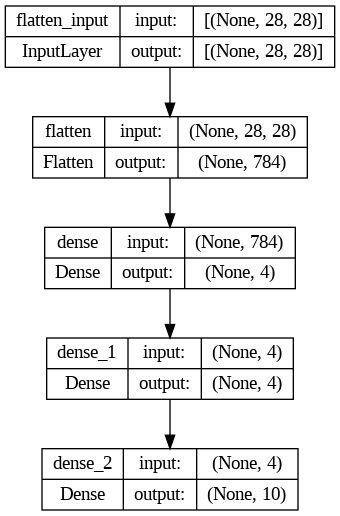

In [45]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_13, show_shapes=True)
